## Problem Set 1
### Yongfei Lu

## Problem1 1-D Kernel Density Estimator

### (a)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load data
covid_df = pd.read_csv('data/COVIDincubation.txt')
covid_df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


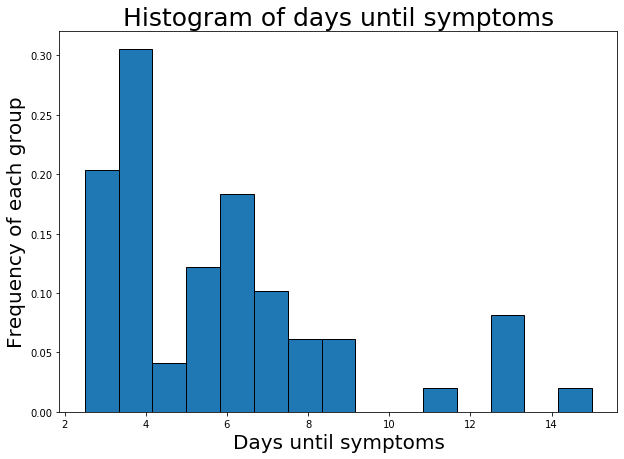

In [26]:
symp_days_overall = covid_df['symp_days'].values
plt.figure(figsize = (10,7))
n_total, bin_cuts_total, patches_total = plt.hist(symp_days_overall, 15, density=True, edgecolor='black')
plt.xlabel('Days until symptoms', fontsize = 20)
plt.ylabel('Frequency of each group', fontsize = 20)
plt.title('Histogram of days until symptoms', fontsize = 25)
plt.show()

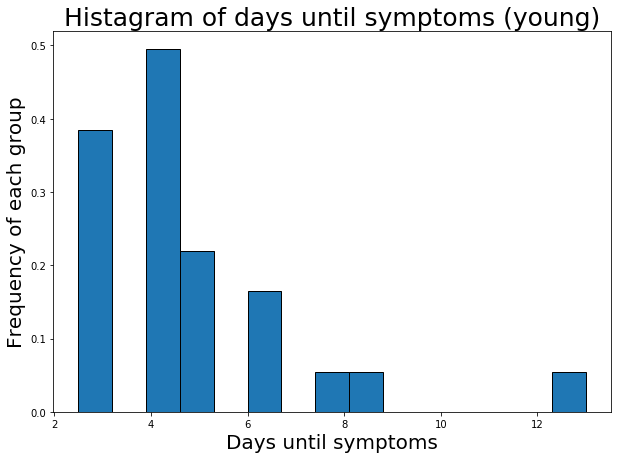

In [25]:
symp_days_young = covid_df['symp_days'][covid_df['age'] <= 40].values
plt.figure(figsize = (10,7))
n_young, bin_cuts_young, patches_young = plt.hist(symp_days_young, 15, density = True, edgecolor = 'black')
plt.xlabel('Days until symptoms', fontsize = 20)
plt.ylabel('Frequency of each group', fontsize = 20)
plt.title('Histagram of days until symptoms (young)', fontsize = 25)
plt.show()

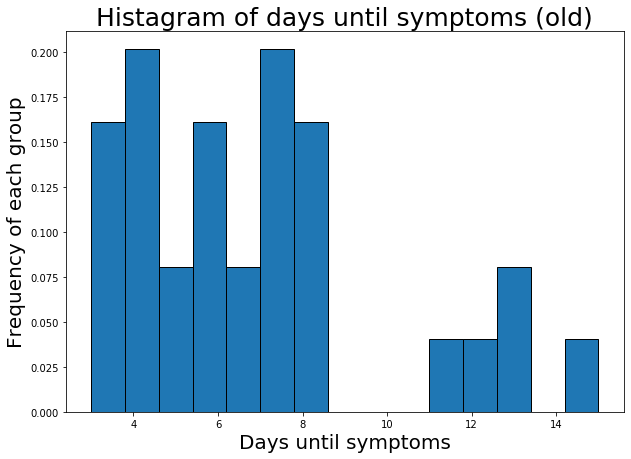

In [24]:
symp_days_old = covid_df['symp_days'][covid_df['age'] > 40].values
plt.figure(figsize = (10,7))
n_old, bin_cuts_old, patches_old = plt.hist(symp_days_old, 15, density = True, edgecolor = 'black')
plt.xlabel('Days until symptoms', fontsize = 20)
plt.ylabel('Frequency of each group', fontsize = 20)
plt.title('Histagram of days until symptoms (old)', fontsize = 25)
plt.show()

### (b)

In [29]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [31]:
# find optimal bandwidths for the three KDEs
# full sample
n_total = symp_days_overall.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                   {'bandwidth': bandwidths},
                   cv = LeaveOneOut())
grid.fit(symp_days_overall.reshape((n_total, 1)))
bandwidth_total = grid.best_params_['bandwidth']

# for young sample: age <= 40
n_young = symp_days_young.size
grid.fit(symp_days_young.reshape((n_young, 1)))
bandwidth_young = grid.best_params_['bandwidth']

# for old sample: age > 40
n_old = symp_days_old.size
grid.fit(symp_days_old.reshape((n_old, 1)))
bandwidth_old = grid.best_params_['bandwidth']

In [35]:
d = {'Sample': ['full sample', 'young sample', 'old sample'],
     'Optimal Bandwidth': [bandwidth_total, bandwidth_young,
                           bandwidth_old]}
pd.DataFrame(data = d)

,Sample,Optimal Bandwidth
0,full sample,0.891045
1,young sample,1.623382
2,old sample,1.186174


Text(0.5, 1.0, 'KDE Density')

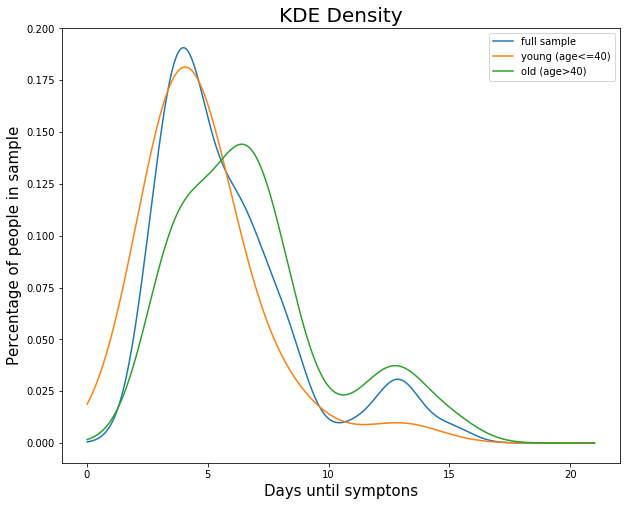

In [45]:
# plot KDEs:

# full sample
x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
kde_total = KernelDensity(bandwidth = bandwidth_total, kernel = 'gaussian')
kde_total.fit(symp_days_overall.reshape((n_total,1)))
logprob_total = kde_total.score_samples(x_pts).reshape((1000,1))

# young sample
kde_young = KernelDensity(bandwidth = bandwidth_young, kernel = 'gaussian')
kde_young.fit(symp_days_young.reshape((symp_days_young.size,1)))
logprob_young=kde_young.score_samples(x_pts).reshape((1000,1))

# old sample
kde_old = KernelDensity(bandwidth = bandwidth_old, kernel='gaussian')
kde_old.fit(symp_days_old.reshape((symp_days_old.size,1)))
logprob_old=kde_old.score_samples(x_pts).reshape((1000,1))

# plot
plt.figure(figsize=(10,8))
plt.gca()
plt.plot(x_pts,np.exp(logprob_total),label='full sample')
plt.plot(x_pts,np.exp(logprob_young),label='young (age<=40)')
plt.plot(x_pts,np.exp(logprob_old),label='old (age>40)')
plt.legend()
plt.xlabel('Days until symptons', fontsize = 15)
plt.ylabel('Percentage of people in sample', fontsize = 15)
plt.title('KDE Density', fontsize = 20)

### (c)

Firstly, the incubation period of young people is shorter than that of old ones. Moreover, the distribution of young people has one peak at around 4 days, while that of old people has one at around 6 days and the other at around 13 days. Therefore, old people should be treated more carefully in terms of covid-19 pandemic. 

## Problem2 2-D Kernel Density Estimator
### (a)

In [52]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

In [54]:
# load data
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

Text(0.5, 0, 'Percent of BQ Received')

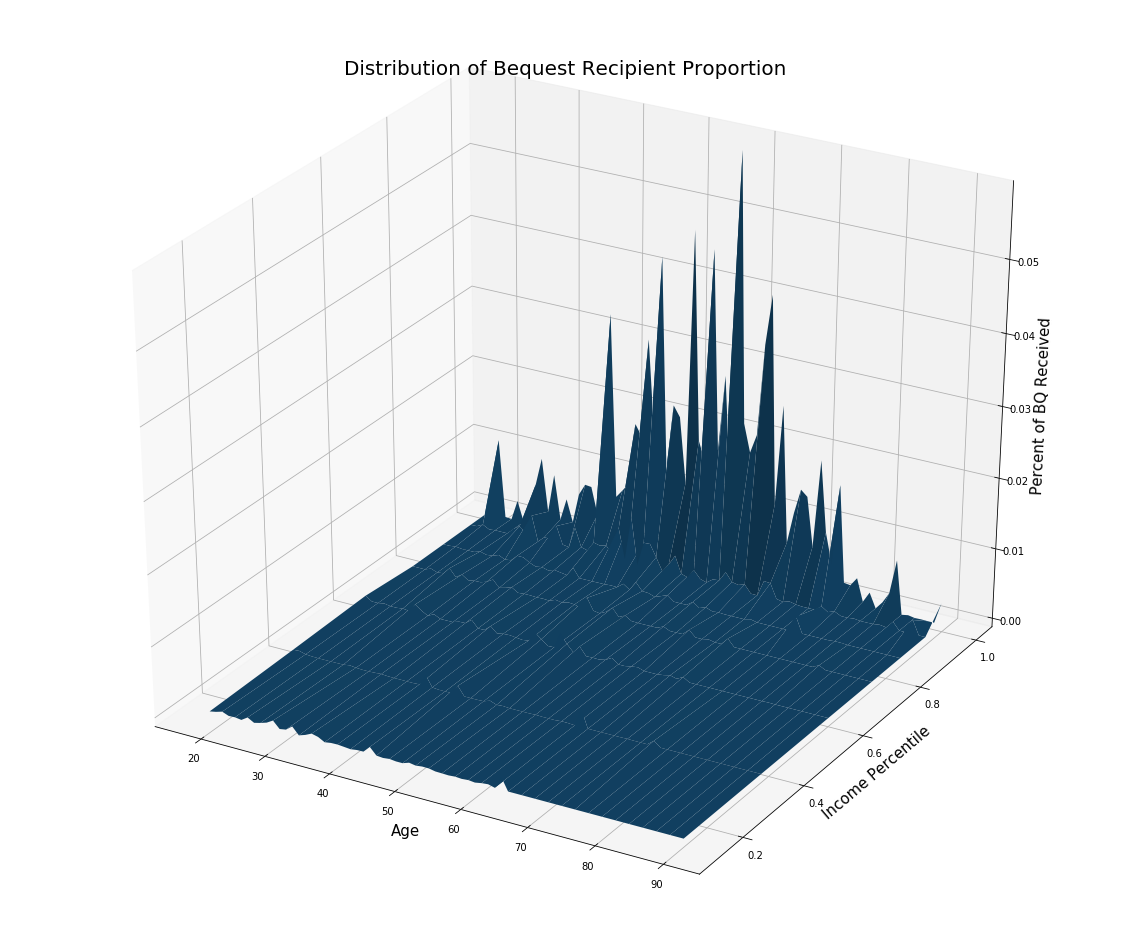

In [66]:
fig = plt.figure(figsize=(20, 17))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Distribution of Bequest Recipient Proportion', fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Income Percentile', fontsize = 15)
ax.set_zlabel('Percent of BQ Received', fontsize = 15)

### (b)

In [80]:
# load data
bq_ind_df = pd.read_csv('data/BQ_ind_data.txt')
bq_ind = bq_ind_df.values
bq_ind_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


No handles with labels found to put in legend.


The bandwidth calculated by Silverman's rule is 0.15576994264628163


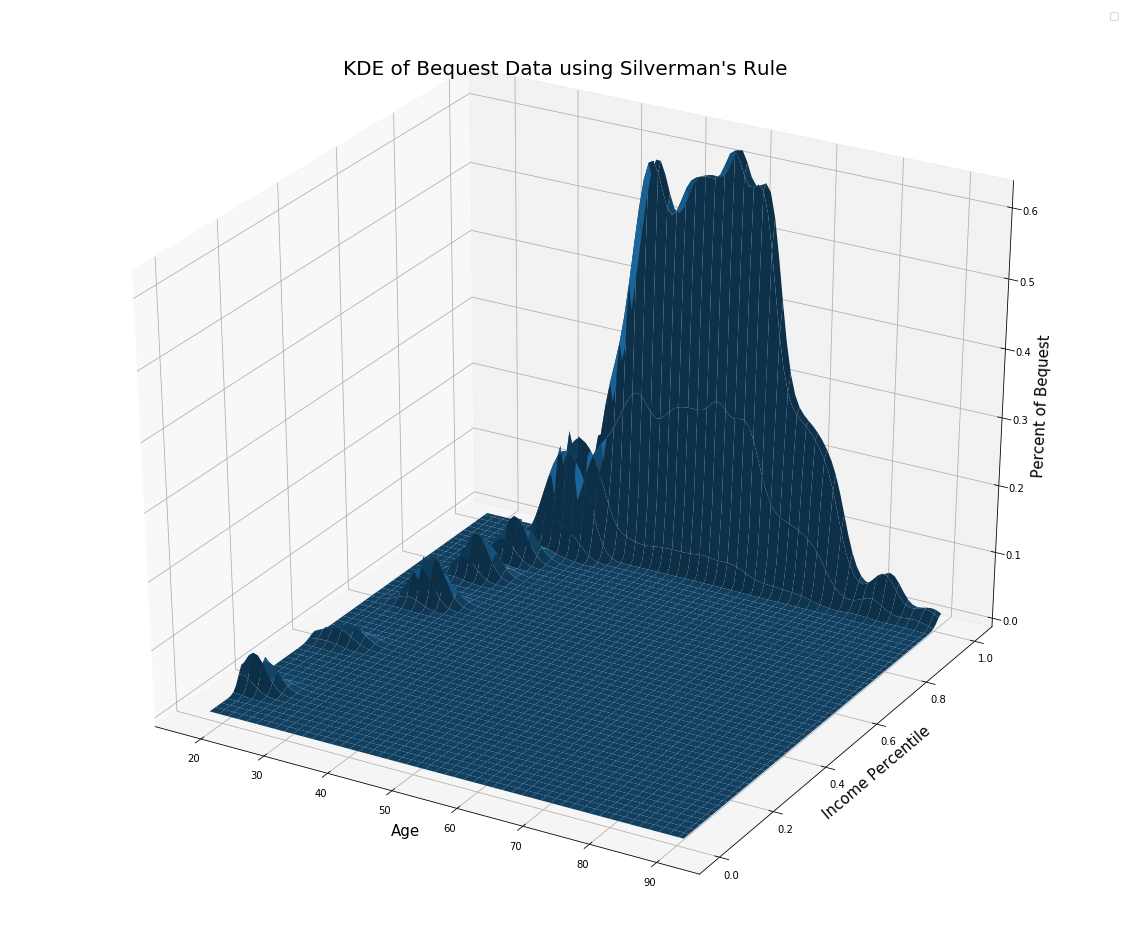

In [86]:
# Using Silverman's rule:
kde_silver = gaussian_kde(bq_ind.T, bw_method='silverman')
age_mat_i, income_mat_i = np.mgrid[18:91:100j,0:1:100j]
coords = np.vstack([i.ravel() for i in [age_mat_i, income_mat_i]])
Z_silverman = np.reshape(kde_silver(coords), age_mat_i.shape)
print("The bandwidth calculated by Silverman's rule is", kde_silver.silverman_factor())

fig = plt.figure(figsize=(20,17))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat_i, income_mat_i, Z_silverman)
ax.set_title("KDE of Bequest Data using Silverman's Rule", fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Income Percentile', fontsize = 15)
ax.set_zlabel('Percent of Bequest', fontsize = 15)
ax.legend()

The bandwidth calculated by Scott's rule is 0.15576994264628163


Text(0.5, 0, 'Percent of bequest')

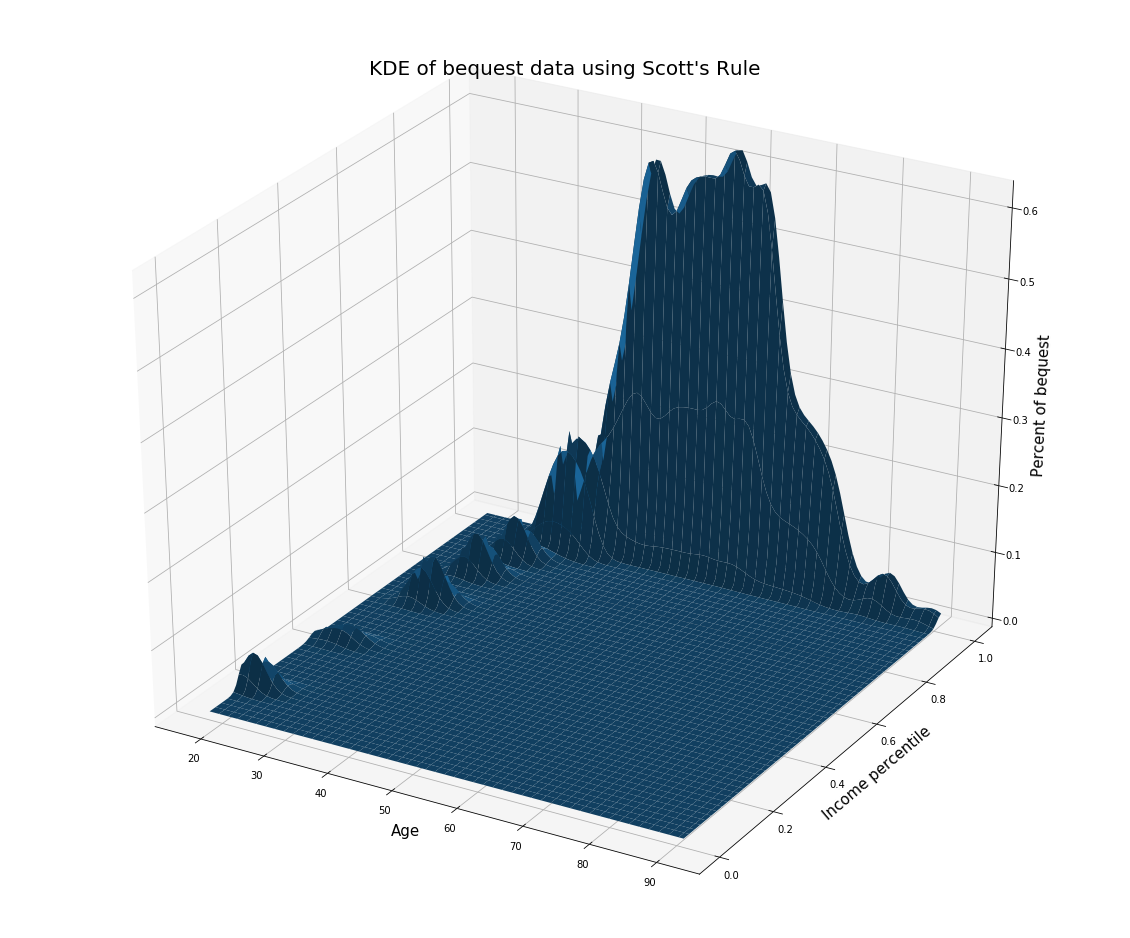

In [87]:
# using Scott's rule
kde_scott = gaussian_kde(bq_ind.T, bw_method='scott')
Z_scott = np.reshape(kde_scott(coords), age_mat_i.shape)
print("The bandwidth calculated by Scott's rule is", kde_scott.scotts_factor())

fig = plt.figure(figsize=(20,17))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat_i, income_mat_i, Z_scott)
ax.set_title("KDE of bequest data using Scott's Rule", fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Income percentile', fontsize = 15)
ax.set_zlabel('Percent of bequest', fontsize = 15)

By Scott's rule and Silverman's Rule, the bandwidth is around 0.16. To further check, I plot the KDE for bandwidth within the range [0, 0.4] with step == 0.05 so that I can find the optimal lambda value.

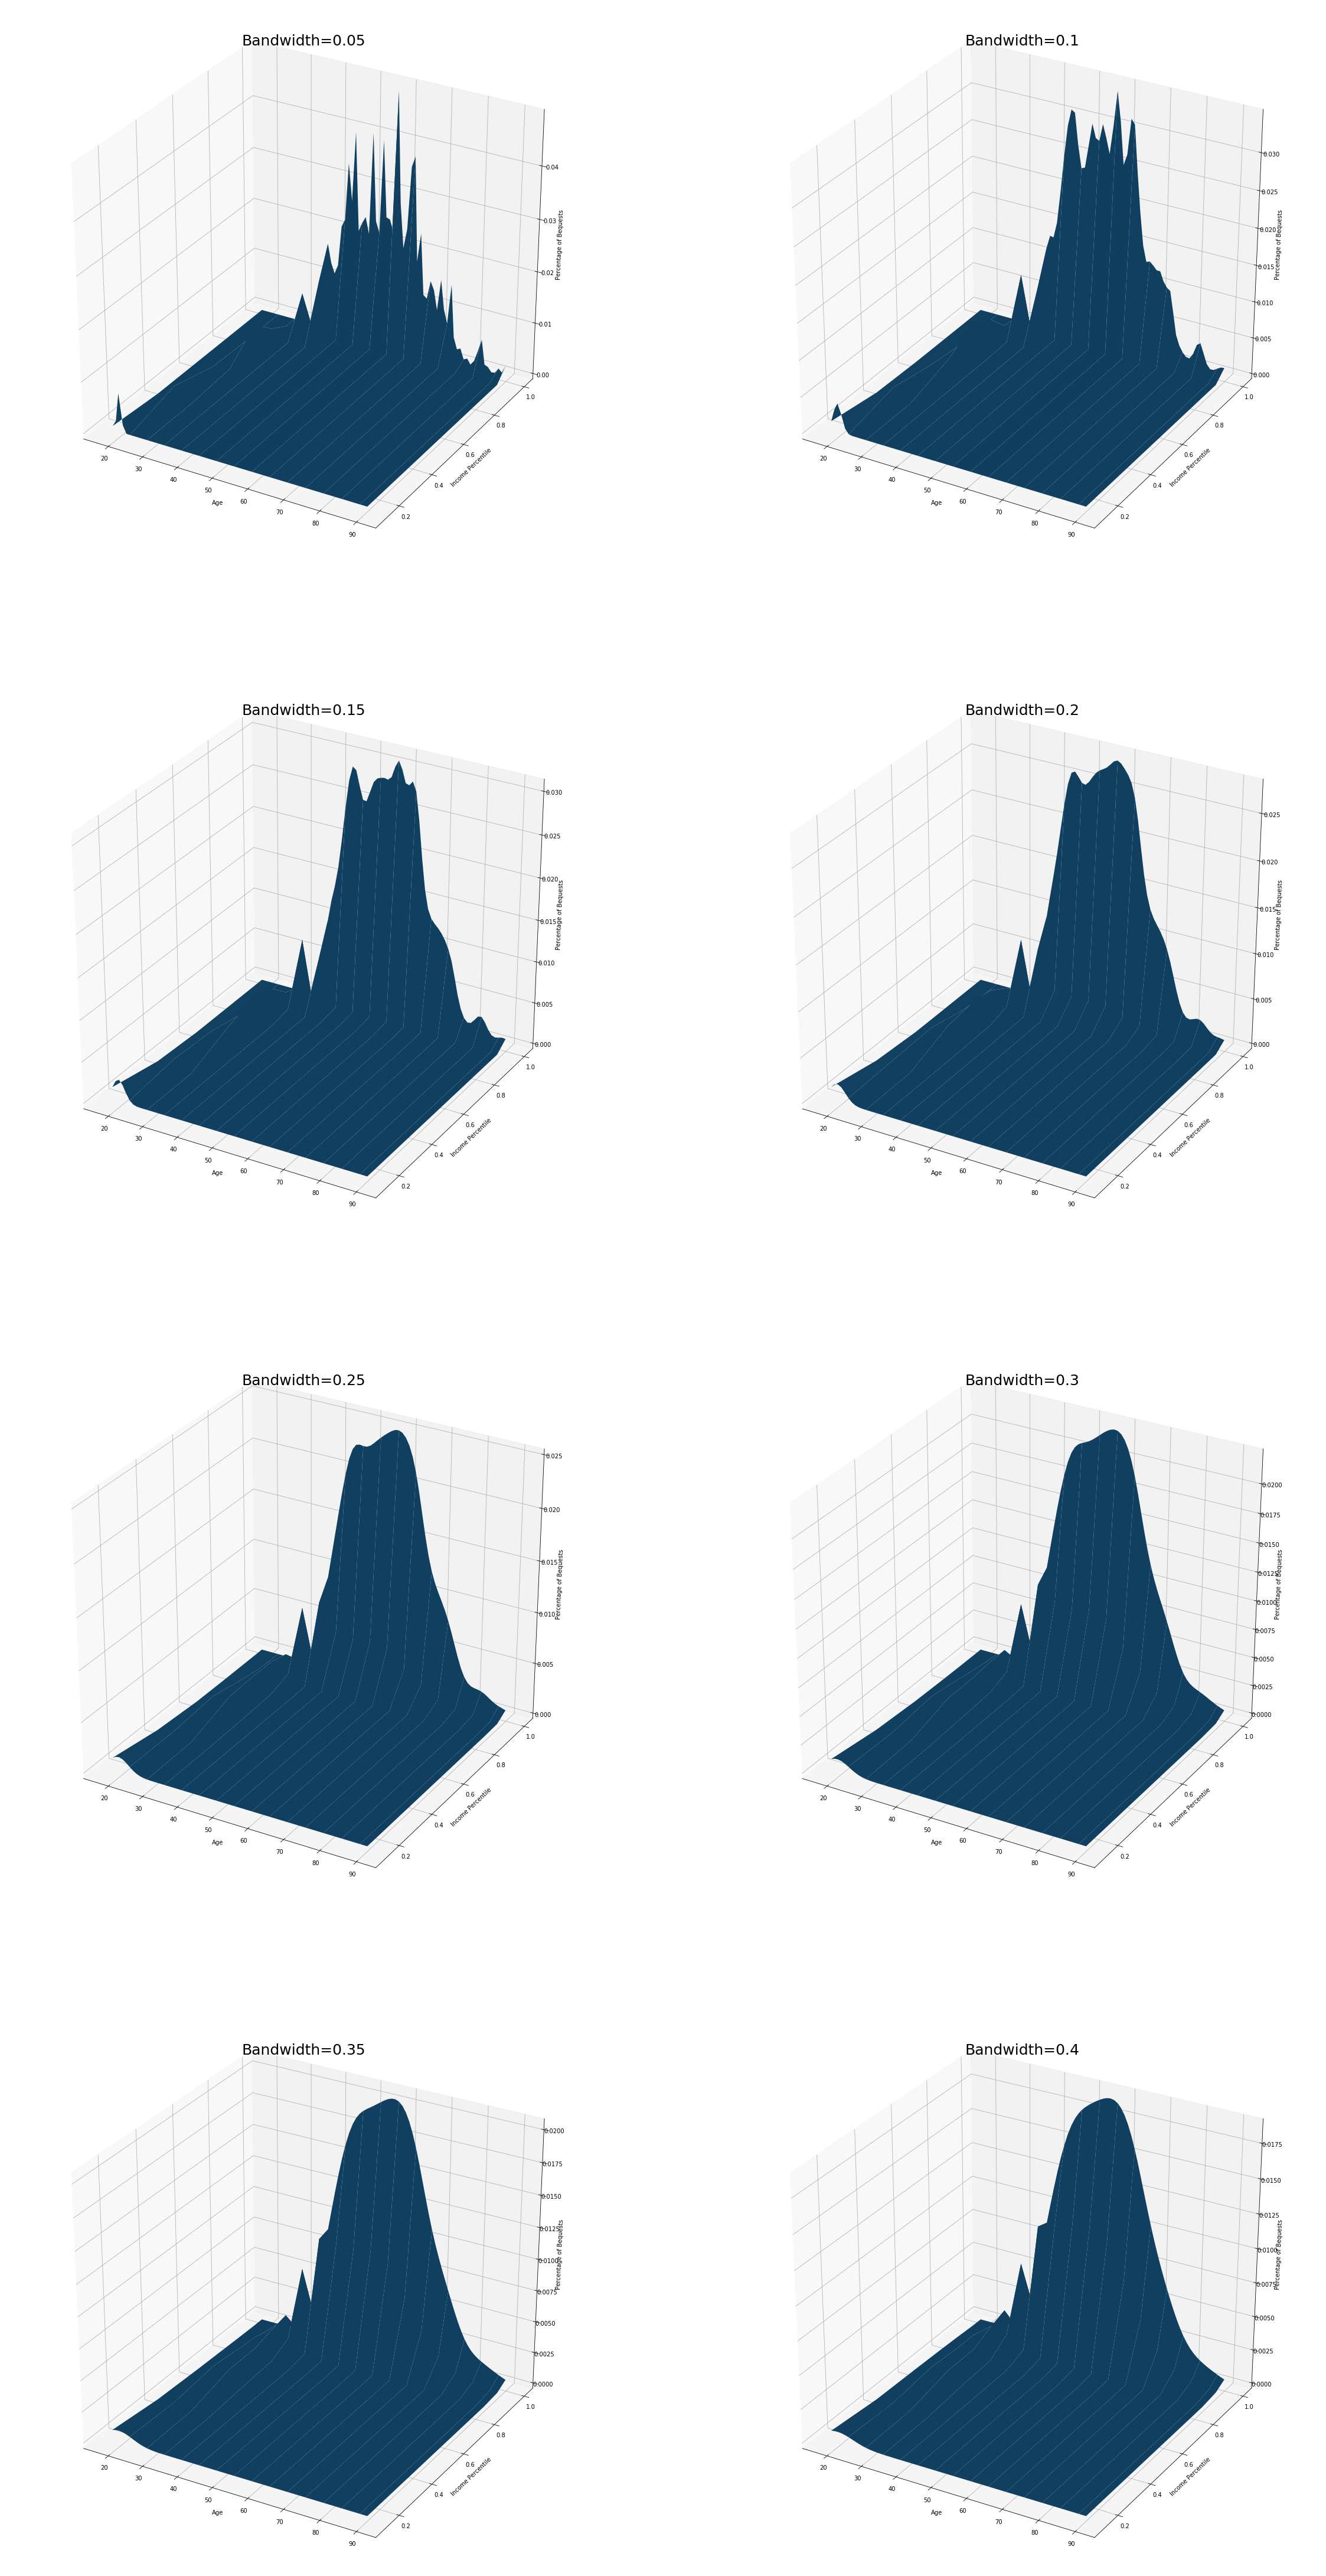

In [88]:
fig=plt.figure(figsize=(40,80))
gs = fig.add_gridspec(4, 2)
coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])

bandwidth = 0.0
for i in range(4):
    for j in range(2):
        bandwidth +=0.05
        kernel = gaussian_kde(bq_ind_df.T, bw_method=bandwidth)

        Z = np.reshape(kernel(coords), age_mat.shape)
        Z_scaled = Z / float(np.sum(Z))

        ax = fig.add_subplot(gs[i,j], projection='3d')
        ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
        ax.set_xlabel("Age")
        ax.set_ylabel("Income Percentile")
        ax.set_zlabel("Percentage of Bequests")
        ax.set_title(r'Bandwidth={}'.format(round(bandwidth,2)),fontsize=25)
        if int(bandwidth) == 0.4:
            break
    if int(bandwidth) == 0.4:
        break

From the plots above, I think $\lambda = 0.25$ is the optimal bandwidth. As $\lambda$ increases over 0.25, the curves become somehow over-smooth, thus loosing some important features. In this case, I think with $\lambda$ equal to 0.25, we can effectively avoid overfitting and underfitting.

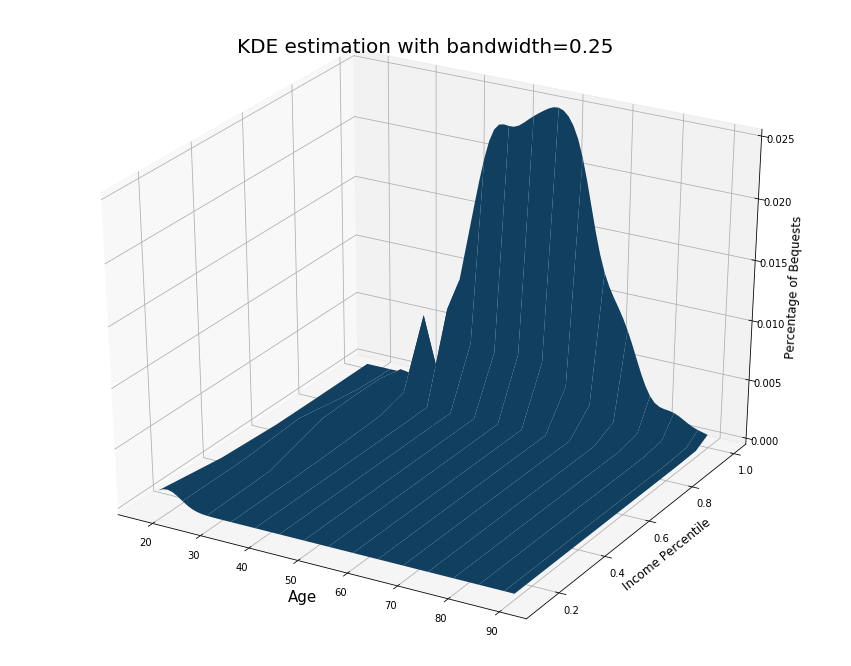

In [92]:
# plot the KDE with bwd = 0.25

fig=plt.figure(figsize=(15,12))
bandwidth=0.25
kernel = gaussian_kde(bq_ind_df.T, bw_method=bandwidth)
Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Income Percentile", fontsize = 12)
ax.set_zlabel("Percentage of Bequests", fontsize = 12)
ax.set_title(r'KDE estimation with bandwidth=0.25'.format(round(bandwidth,2)),
             fontsize = 20)
plt.show()

In [96]:
print('The estimated density for bequest recipients who are age 61 in the\
      6th lifetime income category is around {}.'.format(Z_scaled[61-18+1][5]))

The estimated density for bequest recipients who are age 61 in the      6th lifetime income category is around 0.003360535254398306.
